In [22]:
import matplotlib.pyplot as plt
import numpy as np
from HelperFunctions import *

Read successful.


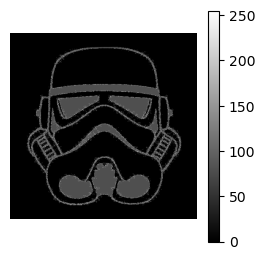

In [23]:
# Load image as numpy array
from PIL import Image

imageOG = None
with Image.open("StormTrooperHelmet.png") as im:
    imageOG = np.asarray(im)
    print("Read successful.")
if imageOG is None:
    print("Read failed.")
if np.size(imageOG,0) != np.size(imageOG,1):
    print("IMAGE INAPPROPRIATE SIZE.")

PreviewImage(imageOG, cmap='gray')

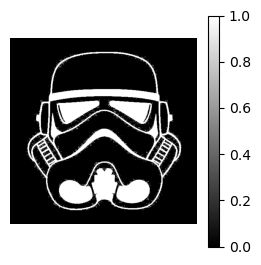

In [24]:
## Preprocess image to binary
image = imageOG.copy()

thresh = 10
image[np.where(imageOG<=thresh)] = 0
image[np.where(imageOG>thresh)] = 1

PreviewImage(image, cmap='gray')

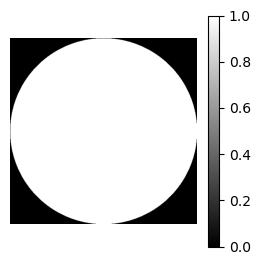

In [25]:
## Create mask as inscribed circle
numRows = np.size(image, 0)
numCols = np.size(image, 1)

circleRad = numRows/2
circleCenter = numRows/2

mask = np.zeros(image.shape, dtype=bool)

for row in range(numRows):
    for col in range(numCols):
        if np.sqrt(np.power(row-circleCenter,2) + np.power(col-circleCenter,2)) <= circleRad:
            mask[row, col] = 1

PreviewImage(mask, cmap='gray')

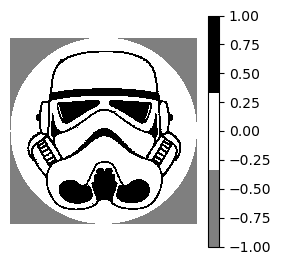

In [26]:
## Apply mask to image

image = np.asarray(image, dtype=np.int16)
image[np.where(mask<0.5)] = -1

PreviewImage(image)

In [27]:
## Create N points around unit circle
N = 10

indices = np.arange(N)
pointGap = 2*np.pi/N
points = np.vstack((np.cos(indices*pointGap), np.sin(indices*pointGap))).T
print("Points.shape:", points.shape)

Points.shape: (10, 2)


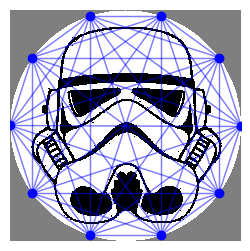

In [28]:
## Plot points and lines

# Get plot
disp = PreviewImage(image, plot=False, plotCB=False)
plt.figure(disp.number)

# Plot points
plt.scatter(points[:,0], points[:,1], c='blue', linewidths=1)

# Plot lines
for i in range(N):
    for j in range(N):
        plt.plot([points[i,0],points[j,0]], [points[i,1],points[j,1]], c='blue', alpha=0.3, linewidth=1)
plt.show()

ValueError: NumPy boolean array indexing assignment cannot assign 50 input values to the 8 output values where the mask is true

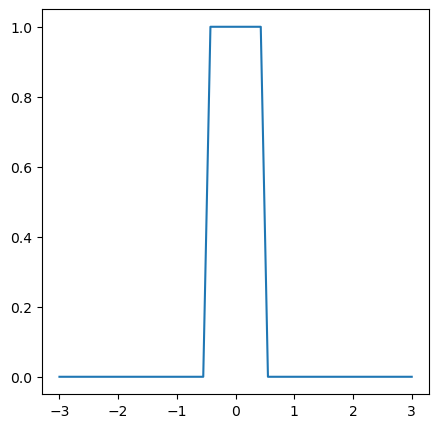

In [30]:
## Make distance weights, range scale [0,1]

def DW_constant(distance):
    dist = np.asarray(distance)
    weights = dist.copy()
    weights[:] = 1
    weights[np.where(np.abs(dist)>0.5)] = 0
    return weights

def DW_parabolic(distance):
    dist = np.asarray(distance)
    weights = np.zeros(dist.shape)
    weights[np.abs(dist)<=0.5] = 1 - 4 * np.power(dist,2)


distances = np.linspace(-3, 3, 50)
plt.figure(figsize=(5,5))
plt.plot(distances, DW_constant(distances), label='Constant')
plt.plot(distances, DW_parabolic(distances), label='Parabolic')
plt.legend()
plt.show()

In [29]:
a = 1
b = np.abs(a)

print(type(a),type(b))

<class 'int'> <class 'numpy.int32'>
